In [4]:
import numpy as np

# Input
For this question, DH parameters are



> 


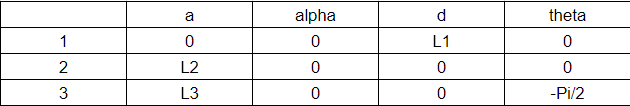

In [7]:
matrix=[]

n=int(input("No. of links: "))
sym=["a","alpha","d","theta"]
for i in range(n):
  a=[]
  for j in range(4):
    a.append(float(input(f"Link-{i+1},{sym[j]} : ")))
  matrix.append(a)
  print("\n")

matrix

No. of links: 3
Link-1,a : 0
Link-1,alpha : 0
Link-1,d : 1
Link-1,theta : 0


Link-2,a : 1
Link-2,alpha : 0
Link-2,d : 0
Link-2,theta : 0


Link-3,a : 1
Link-3,alpha : 0
Link-3,d : 0
Link-3,theta : -1.57079




[[0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, -1.57079]]

# D-H Transformation Matrix Function

In [8]:
def dh(arr):
  a=arr[0]
  alpha=arr[1]
  d=arr[2]
  theta = arr[3]

  mat = []
  b=[np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)]
  mat.append(b)

  b=[np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)]
  mat.append(b)

  b=[0, np.sin(alpha), np.cos(alpha), d]
  mat.append(b)

  b=[0,0,0,1]
  mat.append(b)

  return np.matrix(mat)

In [9]:
dh(matrix[1])

matrix([[ 1., -0.,  0.,  1.],
        [ 0.,  1., -0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]])

#Transformation Matrix

In [10]:
T = np.identity(4)
Tmat = []
for i in range(n):
  T=np.matmul(T,dh(matrix[i]))
  Tmat.append(T)
print(f"Transformation Matrix (0-{n}) : \n\n{T}")

Transformation Matrix (0-3) : 

[[ 6.32679490e-06  1.00000000e+00  0.00000000e+00  1.00000633e+00]
 [-1.00000000e+00  6.32679490e-06  0.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


#End effector Position

In [11]:
pos6=np.matrix([0,0,0,1])
Pos = np.matmul(Tmat[-1],pos6.T)
print(f"Position (0): \n\n{Pos[:3]}")


Position (0): 

[[ 1.00000633]
 [-1.        ]
 [ 1.        ]]
